In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report




In [2]:
# Read the real news dataset from the specified CSV file
real_df = pd.read_csv(r"D:\Fake News Classifier\Data Sources\Fake and real news dataset\Merged data\True.csv")

# Read the fake news dataset from the specified CSV file
fake_df = pd.read_csv(r"D:\Fake News Classifier\Data Sources\Fake and real news dataset\Merged data\Fake.csv")


In [3]:
real_df.head() #prints the first 5 rows

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2022",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2022",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2022",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2022",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2022",Real


In [4]:
real_df.tail() #prints the last 5 rows

,title,text,subject,date,label
30951,"Trump sinks Asia trade pact, opening the way f...",TOKYO/SYDNEY (Reuters) - An ambitious Asia-Pac...,politicsNews,"November 22, 2022",Real
30952,Chinese official optimistic about US trade ami...,WASHINGTON (Reuters) - Chinese Vice Premier Wa...,politicsNews,"November 22, 2022",Real
30953,"Italy to push Iran trade ties, undaunted by Trump",ROME (Reuters) - Italy’s industry minister ple...,politicsNews,"November 22, 2022",Real
30954,Obama's not-so-secret admirer: Donald Trump,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"November 22, 2022",Real
30955,Peru proposes talks to save TPP after Trump fi...,LIMA (Reuters) - Peru proposed new talks to en...,politicsNews,"November 22, 2022",Real


In [5]:
fake_df.head() #prints the first 5 rows

,title,text,subject,date,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fake_df.tail() #prints the last 5 rows

,title,text,subject,date,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
33291,‘BIZARRE’ HILLARY CLINTON After Election Tells...,"In a bizarre interview with Irish TV, wacky g...",politics,"Oct 8, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33292,BREAKING NEWS: NFL Reporter Says Colin Kaepern...,NFL reporter Jason LaCanfora updated football ...,politics,"Oct 8, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33293,TRUMP BLASTS SENATE RINO ON TWITTER…Exposes RE...,President Trump just exposed one of the bigges...,politics,"Oct 8, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33294,BREAKING…VP PENCE and Wife Karen Abruptly Leav...,Mike Pence tweeted about how he was looking fo...,politics,"Oct 8, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33295,MAYORAL CANDIDATE In DIE-HARD DEMOCRAT City Ma...,If John Persinger wins the mayoral race in Eri...,politics,"Oct 8, 2022",Fake,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
real_df.shape # Check the shape of the DataFrame

(30956, 5)

In [8]:
fake_df.shape # Check the shape of the DataFrame

(33296, 172)

In [9]:
real_df.columns # Display the columns of the DataFrame

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [10]:
real_df.dtypes # Display the data types of columns in the DataFrame

title      object
text       object
subject    object
date       object
label      object
dtype: object

In [11]:
fake_df.dtypes # Display the data types of columns in the DataFrame

title           object
text            object
subject         object
date            object
label           object
                 ...  
Unnamed: 167    object
Unnamed: 168    object
Unnamed: 169    object
Unnamed: 170    object
Unnamed: 171    object
Length: 172, dtype: object

In [12]:
fake_df.columns # Display the data types of columns in the DataFrame

Index(['title', 'text', 'subject', 'date', 'label', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=172)

In [13]:
real_df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

# statistical analysis 

In [14]:
real_df.describe()

,title,text,subject,date,label
count,30886,27741,30943,30931,29338
unique,20758,18101,2,366,1
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"November 9, 2022",Real
freq,28,22,20811,316,29338


In [15]:
fake_df.describe()

,title,text,subject,date,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
count,33233,31745,33212,33233,26423,20,20,20,18,18,...,2,2,2,2,2,2,2,2,2,2
unique,17915,17466,17,998,1,10,11,10,9,9,...,1,1,1,1,1,1,1,1,2,1
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 12, 2022",Fake,lowered educational standards to accommodate ...,and voting rights for criminals. In MALDEF s ...,supporters of making English the official lan...,while advocates of sanctions against employe...,Suozzi,...,is that it would be very easy for an agent pr...,and it s certain that the powers that be will...,it s important to separate the fallout from t...,as those in mainstream media such as The New ...,The Washington Post and the self-anointed fa...,seem to have propped up this pizzeria conspir...,but for the moment,it seems to have collapsed under the weight o...,US_News,"December 28, 2022"
freq,6,626,18100,122,26423,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2


# Cleaning The Data And Data Visualization

In [16]:
real_df.isna()

,title,text,subject,date,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
30951,False,False,False,False,False
30952,False,False,False,False,False
30953,False,False,False,False,False
30954,False,False,False,False,False


In [17]:
fake_df.isna()

,title,text,subject,date,label,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33291,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
33292,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
33293,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
33294,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [18]:
missing_values_sum = real_df.isna().sum()

print("Sum of missing values in each column:")
print(missing_values_sum)

Sum of missing values in each column:
title        70
text       3215
subject      13
date         25
label      1618
dtype: int64


In [19]:
total_missing_values = missing_values_sum.sum()
print("Total number of missing values in the DataFrame:", total_missing_values)


Total number of missing values in the DataFrame: 4941


In [20]:
missing_values_summ = fake_df.isna().sum()

print("Sum of missing values in each column:")
print(missing_values_summ)

Sum of missing values in each column:
title              63
text             1551
subject            84
date               63
label            6873
                ...  
Unnamed: 167    33294
Unnamed: 168    33294
Unnamed: 169    33294
Unnamed: 170    33294
Unnamed: 171    33294
Length: 172, dtype: int64


In [21]:
total_missing_values_fake = missing_values_summ.sum()
print("Total number of missing values in the DataFrame:", total_missing_values_fake)

Total number of missing values in the DataFrame: 5567594


In [22]:
duplicate_rows = real_df[real_df.duplicated()]

print("Duplicate Rows except first occurrence based on all columns:")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns:
                                                   title  \
445    Senate tax bill stalls on deficit-focused 'tri...   
778    Trump warns 'rogue regime' North Korea of grav...   
892    Republicans unveil tax cut bill, but the hard ...   
896    Trump taps Fed centrist Powell to lead U.S. ce...   
974    Two ex-Trump aides charged in Russia probe, th...   
...                                                  ...   
30951  Trump sinks Asia trade pact, opening the way f...   
30952  Chinese official optimistic about US trade ami...   
30953  Italy to push Iran trade ties, undaunted by Trump   
30954        Obama's not-so-secret admirer: Donald Trump   
30955  Peru proposes talks to save TPP after Trump fi...   

                                                    text       subject  \
445    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews

In [23]:
duplicate_rows_fake = fake_df[fake_df.duplicated()]

print("Duplicate Rows except first occurrence based on all columns:")
print(duplicate_rows_fake)

Duplicate Rows except first occurrence based on all columns:
                                                   title  \
9733                                                 NaN   
9946   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
11450  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
12411                                                NaN   
12412                                                NaN   
...                                                  ...   
33291  ‘BIZARRE’ HILLARY CLINTON After Election Tells...   
33292  BREAKING NEWS: NFL Reporter Says Colin Kaepern...   
33293  TRUMP BLASTS SENATE RINO ON TWITTER…Exposes RE...   
33294  BREAKING…VP PENCE and Wife Karen Abruptly Leav...   
33295  MAYORAL CANDIDATE In DIE-HARD DEMOCRAT City Ma...   

                                                    text   subject  \
9733                                                 NaN       NaN   
9946   No time to waste   we've got to fight with eve...  politics   
11450   

In [24]:
# Assuming your DataFrame is named df

# Count the total number of cells in the DataFrame
total_cells = real_df.size

# Count the total number of missing values in the DataFrame
total_missing_values = real_df.isna().sum().sum()

# Calculate the percentage of missing values
missing_values_percentage = (total_missing_values / total_cells) * 100

print("Total missing values percentage in the DataFrame:", missing_values_percentage)


Total missing values percentage in the DataFrame: 3.192272903475901


In [25]:
# Count the total number of cells in the DataFrame
total_cells_fake = fake_df.size

# Count the total number of missing values in the DataFrame
total_missing_values_fake = fake_df.isna().sum().sum()

# Calculate the percentage of missing values
missing_values_percentage_fake = (total_missing_values_fake / total_cells_fake) * 100

print("Total missing values percentage in the DataFrame:", missing_values_percentage_fake)


Total missing values percentage in the DataFrame: 97.21808192617593


In [26]:
num_duplicates = len(duplicate_rows)

print("Number of duplicate rows in all columns:", num_duplicates)

Number of duplicate rows in all columns: 9762


In [27]:
num_duplicates_fake = len(duplicate_rows_fake)

print("Number of duplicate rows in all columns:", num_duplicates_fake)

Number of duplicate rows in all columns: 1528


In [28]:
# Count duplicate rows
duplicate_rows_count = real_df.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(real_df)

# Calculate the percentage of duplicate rows
percentage_duplicates = (duplicate_rows_count / total_rows) * 100

print("Percentage of duplicate rows in the DataFrame:", percentage_duplicates)


Percentage of duplicate rows in the DataFrame: 31.535082051944695


In [29]:
# Count duplicate rows
duplicate_rows_count_fake = fake_df.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows_fake = len(fake_df)

# Calculate the percentage of duplicate rows
percentage_duplicates_fake = (duplicate_rows_count_fake / total_rows_fake) * 100

print("Percentage of duplicate rows in the DataFrame:", percentage_duplicates_fake)

Percentage of duplicate rows in the DataFrame: 4.589139836617011


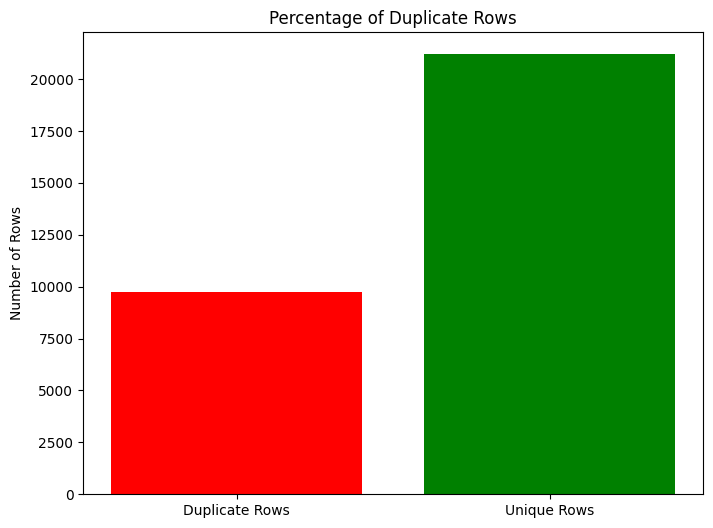

In [30]:
# Count duplicate rows
duplicate_rows_count = real_df.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = len(real_df)

# Calculate the percentage of duplicate rows
percentage_duplicates = (duplicate_rows_count / total_rows) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Duplicate Rows', 'Unique Rows'], [duplicate_rows_count, total_rows - duplicate_rows_count], color=['red', 'green'])
plt.title('Percentage of Duplicate Rows')
plt.ylabel('Number of Rows')
plt.show()


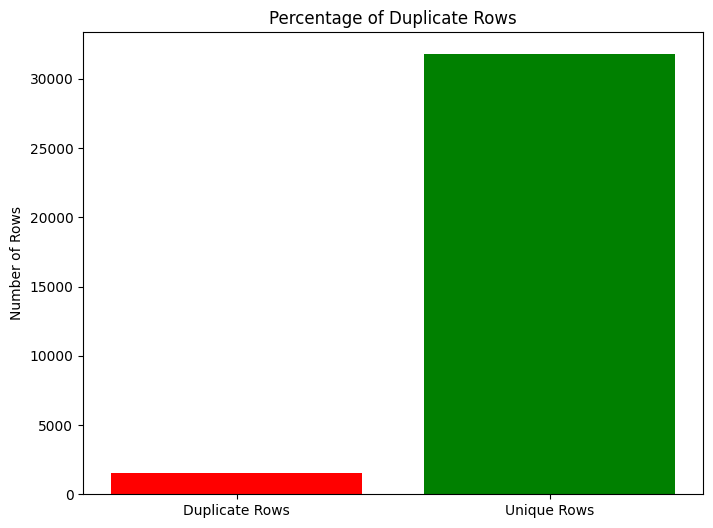

In [31]:
# Count duplicate rows
duplicate_rows_count_fake = fake_df.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows_fake = len(fake_df)

# Calculate the percentage of duplicate rows
percentage_duplicates_fake = (duplicate_rows_count_fake / total_rows_fake) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Duplicate Rows', 'Unique Rows'], [duplicate_rows_count_fake, total_rows_fake - duplicate_rows_count_fake], color=['red', 'green'])
plt.title('Percentage of Duplicate Rows')
plt.ylabel('Number of Rows')
plt.show()

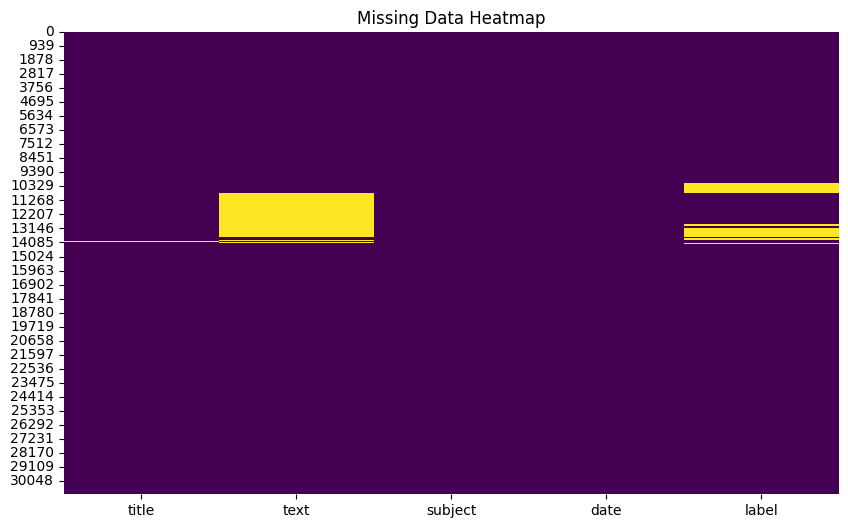

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(real_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()


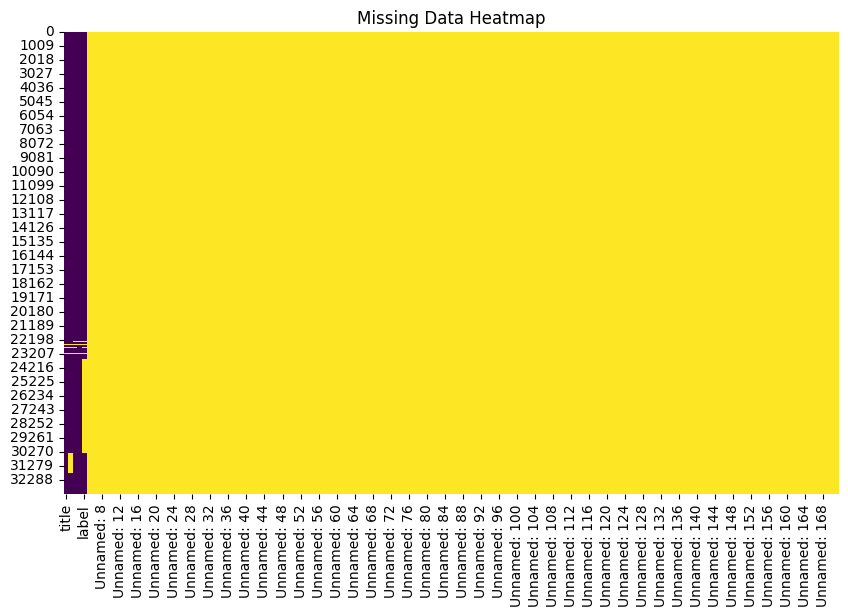

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(fake_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()


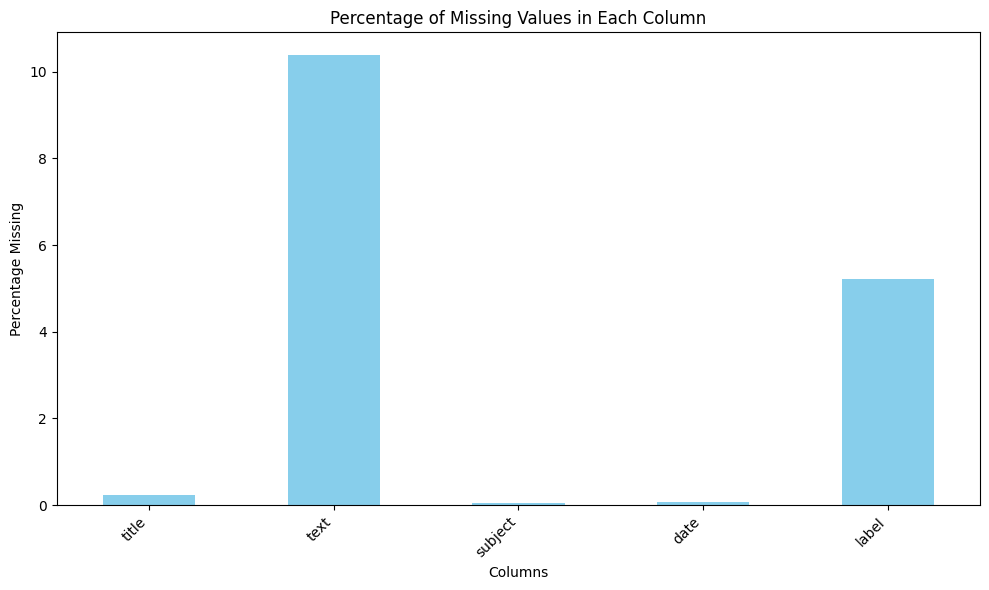

In [34]:
# Calculate the percentage of missing values in each column
missing_percentage = (real_df.isnull().sum() / len(real_df)) * 100

# Plotting
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [35]:
fake_df.columns

Index(['title', 'text', 'subject', 'date', 'label', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=172)

In [36]:
# Drop columns containing garbage values
fake_df = fake_df.drop(columns=fake_df.columns[5:172])

# Now, you can proceed with further analysis or tasks using the cleaned DataFrame


In [37]:
fake_df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

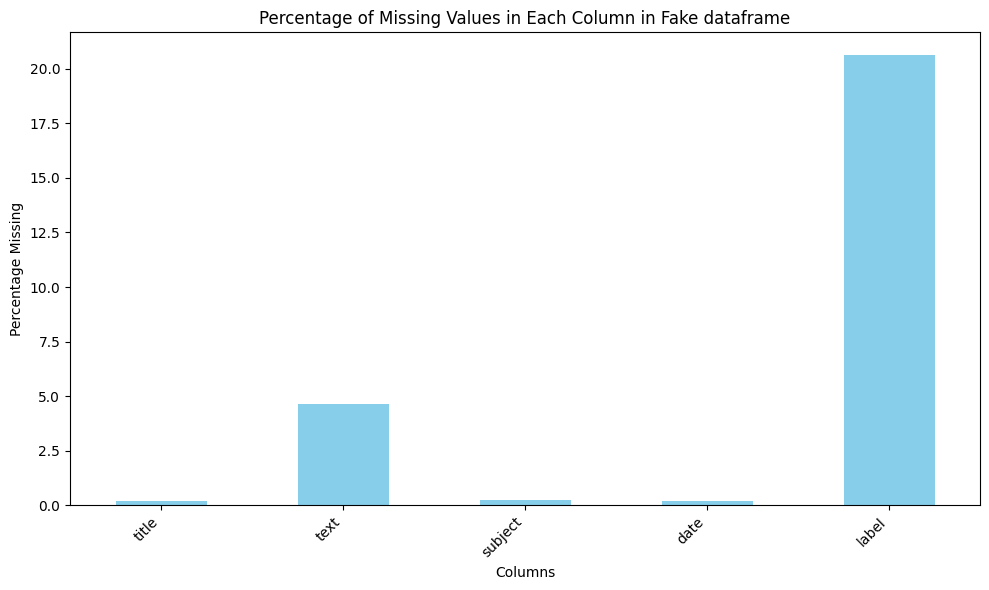

In [38]:
# Calculate the percentage of missing values in each column
missing_percentage = (fake_df.isnull().sum() / len(fake_df)) * 100

# Plotting
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values in Each Column in Fake dataframe')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
# Drop rows with null values
real_df = real_df.dropna()

# Now,dfcontains no rows with null values


In [40]:
real_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [41]:
# Drop rows with null values
fake_df = fake_df.dropna()

# Now, fake_df contains no rows with null values


In [42]:
fake_df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [43]:
# Find duplicate rows
duplicate_rows = fake_df[fake_df.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
                                                   title  \
9946   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...   
11450  FORMER DEMOCRAT WARNS Young Americans: “Rioter...   
14937  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   
17865           oros-backed Center for American Progress   
19641  rtion into developing regions of the world.Nat...   
...                                                  ...   
33291  ‘BIZARRE’ HILLARY CLINTON After Election Tells...   
33292  BREAKING NEWS: NFL Reporter Says Colin Kaepern...   
33293  TRUMP BLASTS SENATE RINO ON TWITTER…Exposes RE...   
33294  BREAKING…VP PENCE and Wife Karen Abruptly Leav...   
33295  MAYORAL CANDIDATE In DIE-HARD DEMOCRAT City Ma...   

                                                    text  \
9946   No time to waste   we've got to fight with eve...   
11450   Who is silencing political speech, physically...   
14937  They were probably just looking for a  safe sp...   
17865        and is hea

In [44]:
# Find the sum of duplicate rows
sum_duplicates = fake_df.duplicated().sum()

# Display the sum of duplicate rows
print("Sum of Duplicate Rows:", sum_duplicates)


Sum of Duplicate Rows: 1467


In [45]:
# Remove duplicate rows
cleaned_fake_df = fake_df.drop_duplicates()

# Display the cleaned DataFrame
print("DataFrame after removing duplicates:")
print(cleaned_fake_df)


DataFrame after removing duplicates:
                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23560  McPain: John McCain Furious That Iran Treated ...   
23561  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23562  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23563  How to Blow $700 Million: Al Jazeera America F...   
23564  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it wa

In [46]:
# Remove duplicate rows
cleaned_real_df = real_df.drop_duplicates()

# Display the cleaned DataFrame
print("DataFrame after removing duplicates:")
print(cleaned_real_df)

DataFrame after removing duplicates:
                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (R

In [47]:
cleaned_real_df.shape

(17233, 5)

In [48]:
cleaned_fake_df.shape

(23468, 5)

In [49]:
cleaned_fake_df["class"]=0
cleaned_real_df["class"]=1

In [50]:
# Remove the 'Label' column from cleaned_fake_df
cleaned_fake_df = cleaned_fake_df.drop(columns=['label'])

# Remove the 'Label' column from cleaned_real_df
cleaned_real_df = cleaned_real_df.drop(columns=['label'])

In [51]:
cleaned_fake_df.shape, cleaned_real_df.shape

((23468, 5), (17233, 5))

In [52]:
cleaned_fake_df.tail()

,title,text,subject,date,class
23560,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2022",0
23561,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2022",0
23562,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2022",0
23563,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2022",0
23564,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2022",0


In [53]:
cleaned_real_df.tail()

,title,text,subject,date,class
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2022",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2022",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2022",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2022",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2022",1


In [54]:
cleaned_fake_df.shape, cleaned_real_df.shape

((23468, 5), (17233, 5))

In [55]:
cleaned_fake_df_manual_testing = cleaned_fake_df.tail(10)

rows_to_drop = 100
rows_dropped = 0
i = 23466

while rows_dropped < rows_to_drop and i >= 0:
    if i in cleaned_fake_df.index:
        cleaned_fake_df.drop([i], axis=0, inplace=True)
        rows_dropped += 1
    i -= 1

print(f"Total rows dropped: {rows_dropped}")


Total rows dropped: 100


In [56]:
cleaned_real_df_manual_testing = cleaned_real_df.tail(10)

rows_to_drop = 100
rows_dropped = 0
i = 17232

while rows_dropped < rows_to_drop and i >= 0:
    if i in cleaned_real_df.index:
        cleaned_real_df.drop([i], axis=0, inplace=True)
        rows_dropped += 1
    i -= 1

print(f"Total rows dropped: {rows_dropped}")


Total rows dropped: 100


In [57]:
cleaned_fake_df.shape, cleaned_real_df.shape

((23368, 5), (17133, 5))

In [58]:
cleaned_real_df_manual_testing.head()

,title,text,subject,date,class
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2022",1
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2022",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2022",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2022",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2022",1


In [59]:
cleaned_fake_df_manual_testing.head()

,title,text,subject,date,class
23555,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2022",0
23556,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2022",0
23557,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2022",0
23558,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2022",0
23559,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2022",0


In [60]:
data_merge = pd.concat([cleaned_fake_df,cleaned_real_df],axis=0)
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2022",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2022",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2022",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2022",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2022",0


In [61]:
data_merge.tail()

,title,text,subject,date,class
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2022",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2022",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2022",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2022",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2022",1


In [62]:
data_merge.shape

(40501, 5)

In [63]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [64]:
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2022",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2022",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2022",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2022",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2022",0


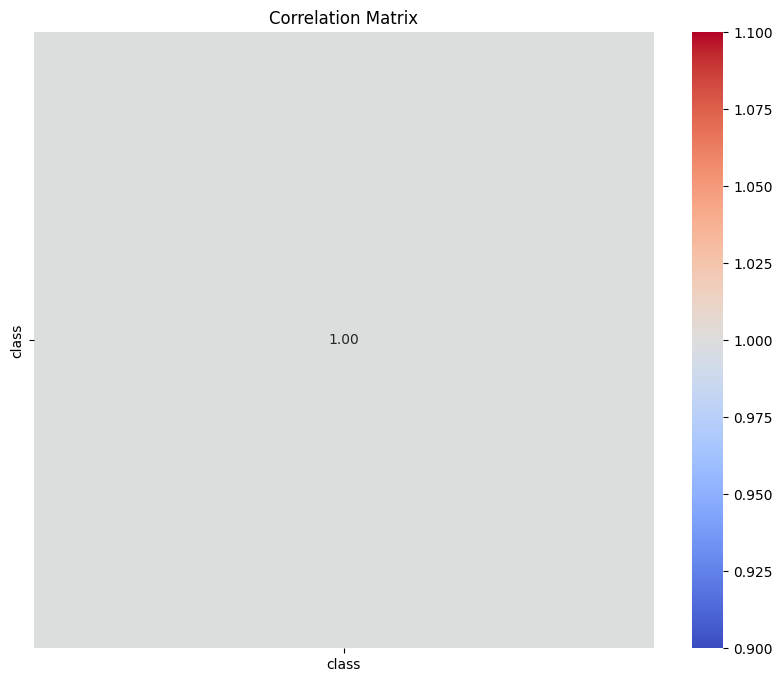

In [65]:
correlation_matrix = data_merge.corr()

# Plotting the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


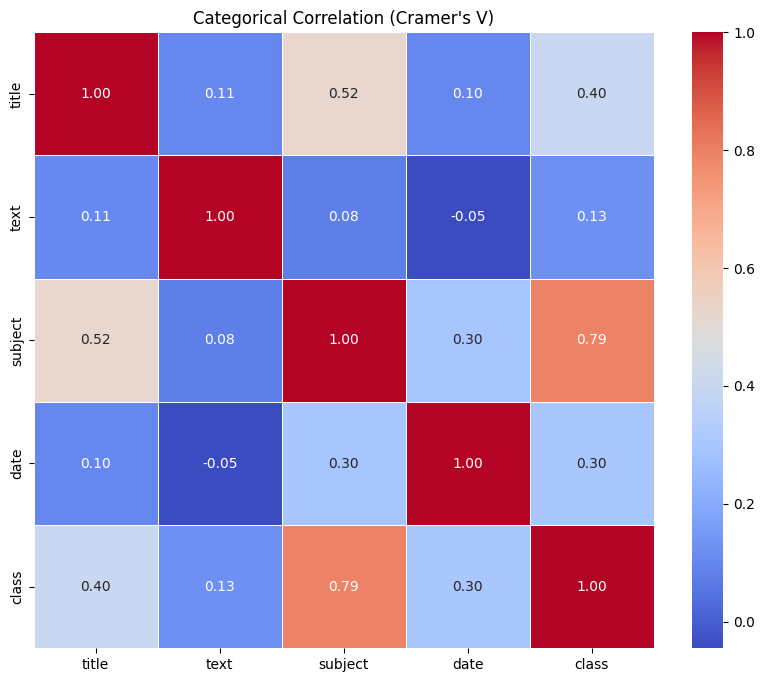

In [66]:
from sklearn.preprocessing import LabelEncoder

# data_merge DataFrame containing categorical variables
encoder = LabelEncoder()
data_encoded = data_merge.apply(encoder.fit_transform)

# Calculate Cramer's V matrix
categorical_corr = data_encoded.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Categorical Correlation (Cramer's V)")
plt.show()

In [67]:
# Number of unique titles
num_unique_titles = data_merge['title'].nunique()
print("Number of unique titles:", num_unique_titles)

# Most common titles
most_common_titles = data_merge['title'].value_counts().head(10)
print("\nMost common titles:")
print(most_common_titles)

# Length of titles
data_merge['title_length'] = data_merge['title'].apply(len)
print("\nSummary statistics of title lengths:")
print(data_merge['title_length'].describe())


Number of unique titles: 34715

Most common titles:
Factbox: Trump fills top jobs for his administration                                                                                               14
Factbox: Contenders for senior jobs in Trump's administration                                                                                       8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead                                               6
Factbox: Contenders, picks for key jobs in Trump's administration                                                                                   5
Factbox: Contenders for key jobs in Trump's administration                                                                                          4
ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TRIP TO COLLEGE FOR THIRD GRADERS                                                                       4
Factbox: Why the Zika virus is causing alarm    

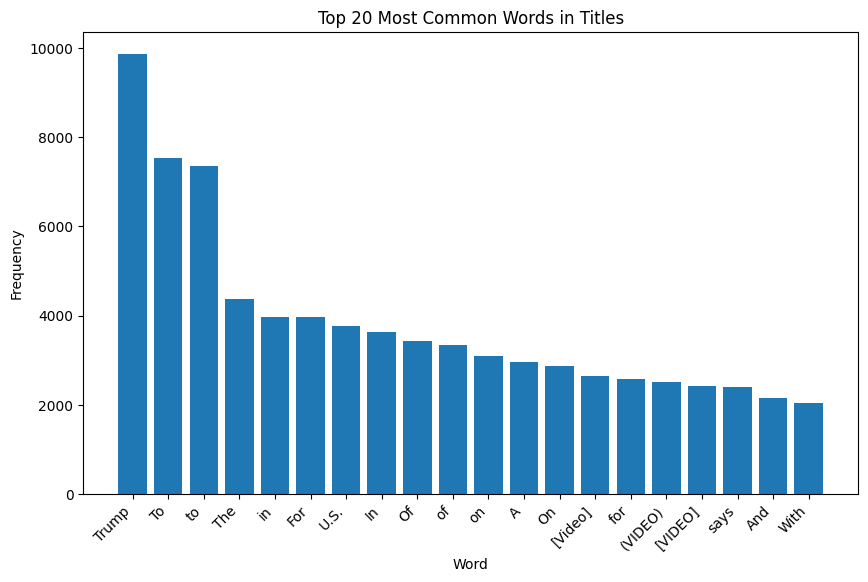

In [68]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the titles into words
titles_words = data_merge['title'].str.split()

# Flatten the list of lists into a single list of words
all_words = [word for sublist in titles_words for word in sublist]

# Count the frequency of each word
word_freq = Counter(all_words)

# Convert the Counter object to a DataFrame for easier manipulation
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top 20 most common words
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Frequency'][:20])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Titles')
plt.show()


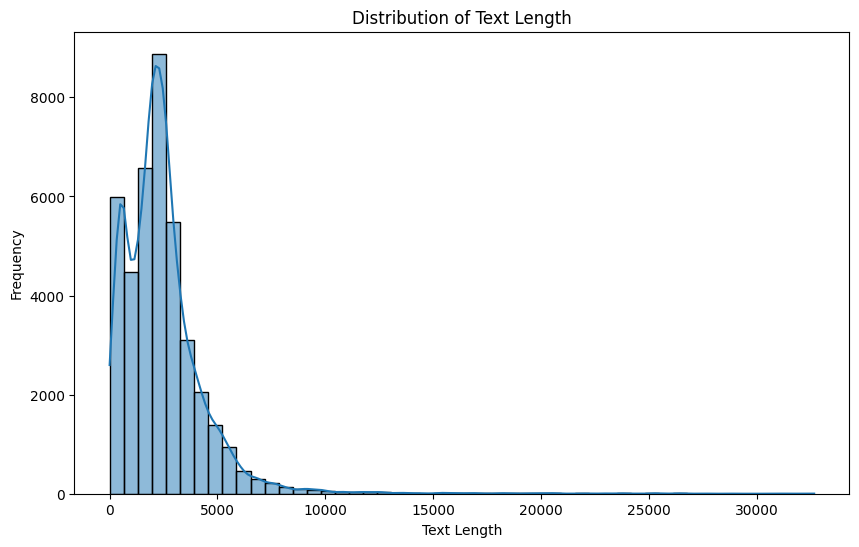

In [69]:
# Text Length Analysis

data_merge['text_length'] = data_merge['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data_merge['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()



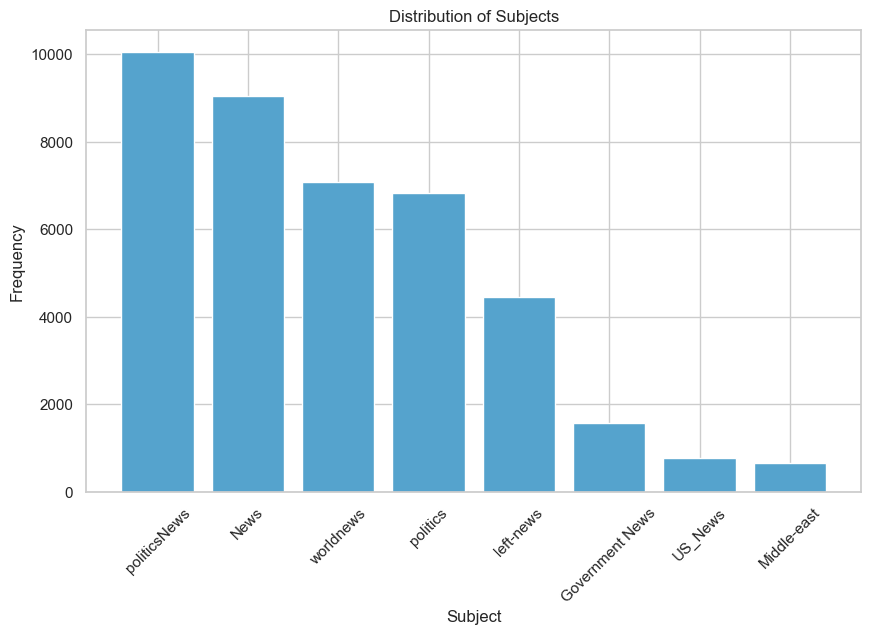

In [70]:
# Define the subjects and their counts
subjects = ['politicsNews', 'News', 'worldnews', 'politics', 'left-news', 'Government News', 'US_News', 'Middle-east']
subject_counts = [10054, 9050, 7079, 6835, 4457, 1570, 775, 670]

# Set the color palette and background color
sns.set(rc={'figure.figsize':(10,5)}, style='whitegrid', palette='icefire')

# Plotting the distribution of categories
plt.figure(figsize=(10, 6))
plt.bar(subjects, subject_counts)
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.title('Distribution of Subjects')
plt.xticks(rotation=45)
plt.show()

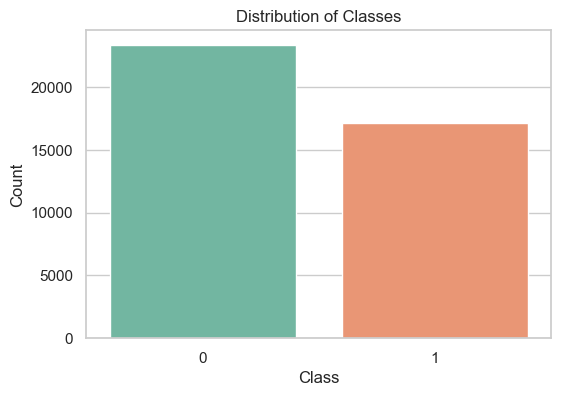

In [71]:
# class column
plt.figure(figsize=(6, 4))
sns.countplot(data_merge['class'], palette='Set2')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [72]:
data = data_merge.drop(['title','subject','date','title_length','text_length'],axis=1)

In [73]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [74]:
data = data.sample(frac=1)

In [75]:
data.head()

,text,class
23124,21st Century Wire says Our weekly documentary ...,0
15872,EDINBURGH (Reuters) - Pro-independence Scottis...,1
16765,MOSCOW (Reuters) - Russian Foreign Minister Se...,1
1482,"The USDA, responsible for everything from our ...",0
915,House Speaker Paul Ryan s office is throwing y...,0


In [76]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1 ,inplace = True)

In [77]:
data.columns

Index(['text', 'class'], dtype='object')

In [78]:
data.head()

,text,class
0,21st Century Wire says Our weekly documentary ...,0
1,EDINBURGH (Reuters) - Pro-independence Scottis...,1
2,MOSCOW (Reuters) - Russian Foreign Minister Se...,1
3,"The USDA, responsible for everything from our ...",0
4,House Speaker Paul Ryan s office is throwing y...,0


In [79]:
data.tail()

,text,class
40496,BEIJING (Reuters) - China must step up its bat...,1
40497,Is Barack Obama planning to use taxpayer money...,0
40498,"For anyone who s paying attention, Hillary jus...",0
40499,Dems Panic In 5 4 3 2 1 Donald Trump s preside...,0
40500,BEIRUT (Reuters) - Rating agency Moody s warne...,1


In [80]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W", " ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text
    

In [81]:
data['text']=data['text'].apply(wordopt)

In [82]:
data.head()

,text,class
0,century wire says our weekly documentary film...,0
1,edinburgh reuters pro independence scottis...,1
2,moscow reuters russian foreign minister se...,1
3,the usda responsible for everything from our ...,0
4,house speaker paul ryan s office is throwing y...,0


In [83]:
x = data['text']
y = data['class']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [86]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [87]:
pred_lr = LR.predict(xv_test) 

In [88]:
LR.score(xv_test, y_test)

0.986470472052143

In [89]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5853
           1       0.98      0.98      0.98      4273

    accuracy                           0.99     10126
   macro avg       0.99      0.99      0.99     10126
weighted avg       0.99      0.99      0.99     10126



In [90]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [91]:
pred_dt = DT.predict(xv_test) 

In [92]:
DT.score(xv_test, y_test)

0.9947659490420699

In [93]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5853
           1       0.99      0.99      0.99      4273

    accuracy                           0.99     10126
   macro avg       0.99      0.99      0.99     10126
weighted avg       0.99      0.99      0.99     10126



In [94]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [95]:
pred_gb = GB.predict(xv_test)

In [96]:
GB.score(xv_test, y_test)

0.9960497728619395

In [97]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5853
           1       0.99      1.00      1.00      4273

    accuracy                           1.00     10126
   macro avg       1.00      1.00      1.00     10126
weighted avg       1.00      1.00      1.00     10126



In [98]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(xv_train,y_train)

RandomForestClassifier()

In [99]:
pred_rf = RF.predict(xv_test)

In [100]:
RF.score(xv_test, y_test)

0.9897294094410428

In [101]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5853
           1       0.99      0.99      0.99      4273

    accuracy                           0.99     10126
   macro avg       0.99      0.99      0.99     10126
weighted avg       0.99      0.99      0.99     10126



In [102]:
import xgboost as xgb


In [103]:
# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(xv_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
# Make predictions with XGBoost
pred_xgb = xgb_model.predict(xv_test)

In [105]:
# Evaluate XGBoost model
print("XGBoost Classification Report:")
print(classification_report(y_test, pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5853
           1       1.00      1.00      1.00      4273

    accuracy                           1.00     10126
   macro avg       1.00      1.00      1.00     10126
weighted avg       1.00      1.00      1.00     10126



In [106]:
# Continue with Gradient Boosting evaluation
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5853
           1       0.99      1.00      1.00      4273

    accuracy                           1.00     10126
   macro avg       1.00      1.00      1.00     10126
weighted avg       1.00      1.00      1.00     10126



In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Train AdaBoost model
ada_model = AdaBoostClassifier()
ada_model.fit(xv_train, y_train)


AdaBoostClassifier()

In [108]:
# Make predictions with AdaBoost
pred_ada = ada_model.predict(xv_test)

In [109]:
# Evaluate AdaBoost model
print("AdaBoost Classification Report:")
print(classification_report(y_test, pred_ada))

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5853
           1       0.99      1.00      1.00      4273

    accuracy                           1.00     10126
   macro avg       1.00      1.00      1.00     10126
weighted avg       1.00      1.00      1.00     10126



In [110]:
def output_label(n):
    if n == 0:
        return "Fake News"
    else:
        return "Not a Fake News"

In [111]:
def manual_test(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    pred_LR = LR.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    return print("\nLR prediction: {} \nRF prediction: {}".format(output_label(pred_LR[0]), output_label(pred_RF[0])))

In [124]:
news = str(input("Enter the news article: "))
manual_test(news)


Enter the news article: "NASA Confirms Earth Will Experience 15 Days of Darkness in November"  This headline spreads a false claim about a celestial event that NASA has never confirmed. Such sensationalized headlines aim to attract clicks and shares without regard for accuracy.

LR prediction: Fake News 
RF prediction: Fake News


# Real News Examples


In [114]:
U.S. Special Counsel Robert Mueller unveiled a trove of documents on Friday showing what he said was irrefutable evidence that President Donald Trump former campaign manager Paul Manafort violated a court gag order by ghost-writing an opinion piece designed to improve his public image. In a 41-page court filing, prosecutors provided emails, copies of documents tracking edits of the draft, and other materials they said proved that Manafort wrote a positive article about his political work in Ukraine. That opinion article, which was published on Thursday in an English-language Ukrainian newspaper, also closely tracked  talking points that Manafort and his business associate Rick Gates created as far back as August 2016, when Manafort was forced to resign from the Trump campaign. 


SyntaxError: invalid syntax (1477198183.py, line 1)

In [ ]:
The White House said on Thursday it was focusing on getting the lowest corporate rate possible in tax reform legislation being considered on Capitol Hill. â€œFifteen (percent) is better than 20, 20 is better than 22 and 22 is better than what we have, White House spokeswoman Sarah Sanders told reporters. 


In [ ]:
U.S. Democratic Senator Al Franken, facing intense pressure to step down following allegations of sexual misconduct, will make an announcement at 11:45 a.m. (1645 GMT) on Thursday, his office said. Franken spokesman Michael Dale-Stein said Franken would make a statement on the Senate floor but did not elaborate. 


In [ ]:
U.S. Senate Republicans agreed to talks with the House of Representatives on sweeping tax legislation on Wednesday, amid early signs that lawmakers could bridge their differences and agree on a final bill ahead of a self-imposed Dec. 22 deadline.   The Republican-led Senate voted 51-47, along party lines with Democrats opposed, to begin formal conference negotiations to reconcile rival House and Senate tax bills passed last week. The move, which follows similar House action this week, brings Congress a step closer to sending President Donald Trump a tax overhaul that he can sign into law. House and Senate negotiators will need to work out differences on issues ranging from business taxes to the repeal of the Obamacare mandate that Americans obtain health insurance or face a penalty before lawmakers can pass a final version. But John Cornyn, the No. 2 Senate Republican, said he was optimistic House and Senate tax negotiators would be able to work out an agreement within the next two weeks. â€œGiven the similarities between the House and the Senate bills, I think there are some obvious targets where they need to focus their attention but obviously they wonâ€™t be rewriting the bills,â€ Cornyn said. Republican negotiators must be careful not to agree to changes that could diminish support in the Senate, where they can afford to lose support from no more than two party members. There has been no major tax overhaul since 1986, when Republican Ronald Reagan was president.   While there are significant differences between the House and Senate bills, both would cut the U.S. corporate tax rate to 20 percent from 35 percent, provide tax relief for â€œpass-throughâ€ enterprises including small businesses where earnings are taxed at individual rates, and both benefit the wealthiest Americans and reduce the tax burden for most middle-class taxpayers.  Republicans claim the legislation will spur enough economic growth to pay for the tax cuts with new revenue, but the nonpartisan Joint Committee on Taxation estimates that Senate bill would still add $1 trillion to the federal budget deficit over a decade, even with an economic upswing. U.S. stock prices have rallied on growing optimism that tax legislation will become law. But on Wednesday, the head of sovereign credit ratings at S&P Global told Reuters that the rising deficit and looser fiscal policy could prompt negative action on U.S. credit ratings unless Washington addressed long-term budgetary issues.  â€œIf U.S. tax reform is approved, it seems certain to increase the federal budget deficit,â€ Moritz Kraemer, S&Pâ€™s sovereign global chief rating officer, said in an interview. â€œA meaningful relaxation of fiscal policy without countervailing measures to address the longer-term fiscal challenges of the U.S. could lead to a negative rating action.â€ Senate Republicans later voted down a Democratic motion instructing tax negotiators to produce a deficit-neutral bill.   Passage of the tax bill would provide a badly needed legislative victory for Trump and Republicans after their failure earlier this year to enact legislation repealing President Barack Obamaâ€™s signature healthcare law. Trump and his Republican allies see enacting the tax overhaul that they promised voters as crucial to their strategy for the 2018 U.S. congressional elections, when all 435 seats in the House of Representatives and 33 seats in the 100-member Senate will be up for election. Democrats have been united against the bill, calling it a handout to corporations and the rich that would drive up the federal deficit. In an early sign of progress on reconciling the House and Senate versions, Senator Orrin Hatch, chairman of the tax-writing Finance Committee, said he did not think that the final bill would retain a corporate alternative minimum tax (AMT). The House bill calls for a repeal of the corporate AMT, which is designed to limit the ability of corporations to reduce their payments through tax breaks and credits. Corporate AMT repeal is not part of the Senate version. Getting rid of the corporate AMT would be popular with many businesses and would also be a concession toward the House bill. But repeal would also require lawmakers to replace the $40 billion in revenues that retaining the corporate AMT would raise over a decade. Increasing the corporate income tax target from 20 percent is seen as one way to pay for the AMT repeal and other potential changes. â€œIâ€™ll keep it at 20 if I can, but thereâ€™s a drive to get it to 22. They want more money, thats why.Hatch told reporters. 


In [ ]:
"U.S. Senate Republicans agreed to talks with the House of Representatives on sweeping tax legislation on Wednesday, amid early signs that lawmakers could bridge their differences and agree on a final bill ahead of a self-imposed Dec. 22 deadline. The Republican-led Senate voted 51-47, along party lines with Democrats opposed, to begin formal conference negotiations to reconcile rival House and Senate tax bills passed last week. The move, which follows similar House action this week, brings Congress a step closer to sending President Donald Trump a tax overhaul that he can sign into law.

In [ ]:
House and Senate negotiators will need to work out differences on issues ranging from business taxes to the repeal of the Obamacare mandate that Americans obtain health insurance or face a penalty before lawmakers can pass a final version. But John Cornyn, the No. 2 Senate Republican, said he was optimistic House and Senate tax negotiators would be able to work out an agreement within the next two weeks. Republican negotiators must be careful not to agree to changes that could diminish support in the Senate, where they can afford to lose support from no more than two party members. There has been no major tax overhaul since 1986, when Republican Ronald Reagan was president. While there are significant differences between the House and Senate bills, both would cut the U.S. corporate tax rate to 20 percent from 35 percent, provide tax relief for "pass-through enterprises including small businesses where earnings are taxed at individual rates, and both benefit the wealthiest Americans and reduce the tax burden for most middle-class taxpayers. 

In [ ]:
Republicans claim the legislation will spur enough economic growth to pay for the tax cuts with new revenue, but the nonpartisan Joint Committee on Taxation estimates that Senate bill would still add $1 trillion to the federal budget deficit over a decade, even with an economic upswing. U.S. stock prices have rallied on growing optimism that tax legislation will become law. But on Wednesday, the head of sovereign credit ratings at S&P Global told Reuters that the rising deficit and looser fiscal policy could prompt negative action on U.S. credit ratings unless Washington addressed long-term budgetary issues. If U.S. tax reform is approved, it seems certain to increase the federal budget deficit, a Moritz Kraemer, S&P's sovereign global chief rating officer, said in an interview. A meaningful relaxation of fiscal policy without countervailing measures to address the longer-term fiscal challenges of the U.S. could lead to a negative rating action. Senate Republicans later voted down a Democratic motion instructing tax negotiators to produce a deficit-neutral bill.

In [ ]:
Democrats have been united against the bill, calling it a handout to corporations and the rich that would drive up the federal deficit. In an early sign of progress on reconciling the House and Senate versions, Senator Orrin Hatch, chairman of the tax-writing Finance Committee, said he did not think that the final bill would retain a corporate alternative minimum tax (AMT). The House bill calls for a repeal of the corporate AMT, which is designed to limit the ability of corporations to reduce their payments through tax breaks and credits. 

In [ ]:
But repeal would also require lawmakers to replace the $40 billion in revenues that retaining the corporate AMT would raise over a decade. Increasing the corporate income tax target from 20 percent is seen as one way to pay for the AMT repeal and other potential changes. all keep it at 20 if I can, but there's a drive to get it to 22. They want more money, that's why,"

In [ ]:
U.S. Senator Dick Durbin, the No. 2 Democrat in the Senate, said on Wednesday that fellow Democrat Al Franken should resign in light of sexual misconduct allegations against him. 'Senator Franken's behavior was wrong. He has admitted to what he did. He should resign from the Senate,' Durbin said on Twitter. Durbin marked the 15th Democratic senator, including third-ranking Democrat Patty Murray, to call on Wednesday for Franken to step down."

# Fake News Examples

In [115]:
Donald Trump has warned that there will be a “bloodbath” if he loses in November. While campaigning for Senate candidate Bernie Moreno in Ohio, the former president said that he, and not Joe Biden, will protect Social Security.Speaking outside of Dayton on Saturday, March 16, Trump praised his chosen candidate in the race as an “America first champion” and “political outsider who has spent his entire life building up Ohio communities.” “He’s going to be a warrior in Washington,” Trump said.In Tuesday’s primary, Moreno faces Secretary of State Frank LaRose and state Sen. Matt Dolan in Tuesday’s GOP primary. Saturday’s rally was held by Buckeye Values PAC, a group that backs Moreno’s candidacy.

Using the stage, Trump said, “If I don’t get elected, it’s going to be a bloodbath ... It’s going to be a bloodbath for the country.” He later added that “If this election isn’t won, I’m not sure that you’ll ever have another election in this country.


SyntaxError: invalid syntax (2986306967.py, line 1)

In [ ]:
"Study Finds Link Between Vaccines and Autism"

This headline suggests a connection between vaccines and autism, which has been debunked by numerous scientific studies. Fake news articles like these can spread misinformation and contribute to vaccine hesitancy.


In [ ]:
"NASA Confirms Earth Will Experience 15 Days of Darkness in November"

This headline spreads a false claim about a celestial event that NASA has never confirmed. Such sensationalized headlines aim to attract clicks and shares without regard for accuracy.

In [ ]:
"Breaking: Hillary Clinton Indicted on Federal Charges"

This type of headline preys on political biases and seeks to discredit a political figure. In reality, there was no indictment of Hillary Clinton on federal charges, but fake news articles like these can manipulate public opinion.

In [ ]:
"New Study Shows Eating Chocolate Every Day Leads to Weight Loss"

This headline promotes a too-good-to-be-true claim that eating chocolate can lead to weight loss. Fake health news like this can mislead readers and promote unhealthy habits.
"Elon Musk Buys Entire Continent of Africa"

In [ ]:
"Elon Musk Buys Entire Continent of Africa"

This headline is absurd and clearly false, but such outlandish claims can sometimes gain traction on social media platforms before being debunked. It demonstrates how fake news can spread quickly if not critically evaluated.